# 1) Initial imports

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

import os

# World Network Setup

Follows heavily from:
https://github.com/Tina333333/WorldCityNetwork/blob/main/CityLinesMinus.xlsx
Airports PNG from MyFlights.py

## Graphing
As based on MyFlights.py

more info at https://gallery.pyecharts.org/#/Map/china_gdp_from_1993_to_2018
https://pyecharts.org/#/en-us/series_options

In [128]:
# pip install pyecharts
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode


world_map = Map(init_opts=opts.InitOpts(theme='white', bg_color='white', width='990px', height='540px'))

# itemstyle_opts=opts.ItemStyleOpts(color="#D3D3D3", border_color="#1E90FF"),
# emphasis_label_opts=opts.LabelOpts(is_show=False),
# emphasis_itemstyle_opts=opts.ItemStyleOpts(color="#323c48")


def add_population(world_map, pop_name, pop_data):
    # Pop Data should be like this:
    # pop_name: the birth place of population
    # pop_data:
    #   [[Current_Location_Name1, Count1], [Current_Location_Name2, Count2], ...]
    #   e.g. [["Australia", 1000], ["China", 2000]]

    # Test adding a simple series
    world_map.add(
        pop_name,
        pop_data,
        "world",
        is_roam=False,
        # tooltip_opts=opts.TooltipOpts(formatter=pop_name + ":{a} - {c}")
        # tooltip_opts=opts.TooltipOpts(formatter=f"{pop_name} in {{b}} - {{c}}\n", trigger='item')
        # tooltip_opts=opts.TooltipOpts(trigger='item', formatter = "Australians: {@[1]}")
    ).set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # Remove labels
# world_m


add_population(world_map, 
    "Australians", 
    [["Australia", 1000], ["China", 200], ["India", 5]]
    )

add_population(world_map, 
    "Chinese", 
    [["Australia", 100], ["China", 30000], ["India", 500]]
    )

# add_population(world_map, 
#     "Population", 
#     [["Australia", {"Australians": 100, "Chinese": 2}],
#         ["China", {"Australians": 1, "Chinese": 2}], 
#         ["India", {"Australians": 1, "Chinese": 2}]]
#     )

# tooltip_formatter = JsCode("""
# function (params) {
#     let result = params[0].name + ':<br/>';
#     for (let i = 0; i < params.length; i++) {
#         result += '• ' + params[i].seriesName + ': ' + params[i].value + '<br/>';
#     }
#     return result;
# }
# """)

world_map.set_global_opts(
        # title_opts=opts.TitleOpts(title="Population"),
        # visualmap_opts=opts.VisualMapOpts(max_=2000, is_piecewise=True, series_index=1),
        visualmap_opts=opts.VisualMapOpts(max_=2000), # https://pyecharts.org/#/en-us/global_options?id=visualmapopts-visual-mapping-configuration-items
        # visualmap_opts=opts.VisualMapOpts(max_=2000, type_="size"),
        # tooltip_opts=opts.TooltipOpts(formatter="{}: {c}")
        # tooltip_opts=opts.TooltipOpts(trigger='series')
        tooltip_opts=opts.TooltipOpts(trigger='item')
        # legend_opts=opts.LegendOpts(
        #     selected_mode="multiple"  # optional: "single" to show one at a time
        #     ),
        # Split into comma separated list
        # tooltip_opts=opts.TooltipOpts(trigger='item', formatter = "Australians: {@Australians}")
    )


world_map.render_notebook()

## Setup (re-loading)

The following code re-loads & rebuilds the graph from the previous notebook for us to continue building on. Any additions are commented as **# NEW!**  To understand anything here, check back over the previous workbook(s). 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import warnings
# import scipy.stats as stats
import random # NEW!
from collections import defaultdict # NEW!
warnings.filterwarnings('ignore', category=UserWarning)
# Set seeds for BOTH random number generators (we use both libraries)
np.random.seed(99) # Set random seed for reproducibility
random.seed(99) # NEW!
df = pd.read_csv('../data/bilat_mig_40_countries.csv')# Load the migration data
# Rebuild the directed graph
G = nx.DiGraph()
for index, row in df.iterrows():
    if row['da_pb_closed'] > 0:
        G.add_edge(row['orig'], row['dest'], weight=row['da_pb_closed'])
print("Libraries loaded and graph rebuilt successfully!")
print(f"Graph: {G.number_of_nodes()} countries, {G.number_of_edges()} migration flows")

Libraries loaded and graph rebuilt successfully!
Graph: 40 countries, 1408 migration flows


# Graphing 2
DIRECT AI COPY

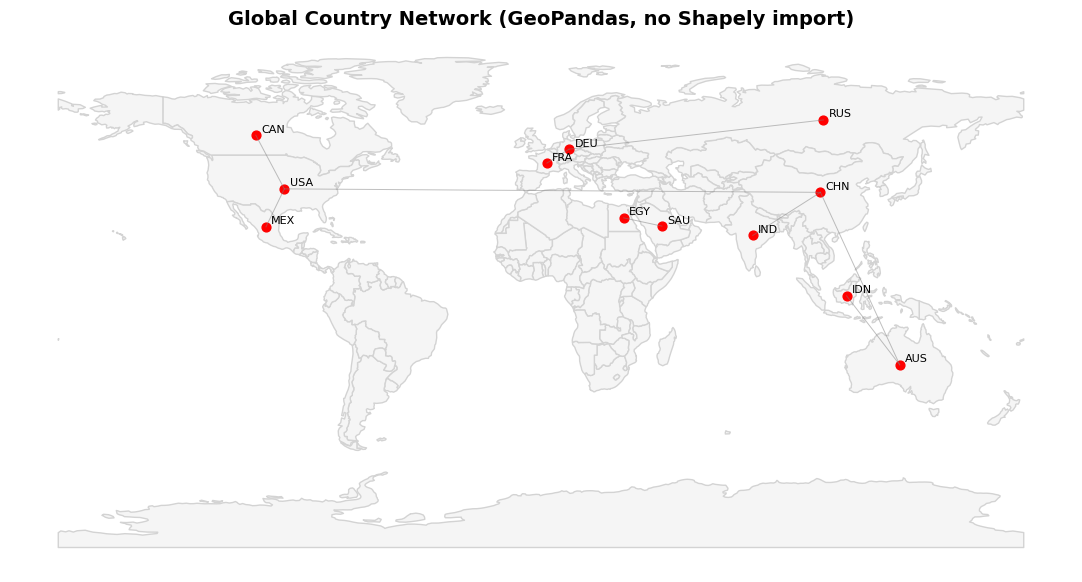

In [8]:
# Retrieve Country Centroids
# Geopy, or dictionary

# 

import geopandas as gpd
# pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Example: small country network
G = nx.Graph()
G.add_edges_from([
    ('USA', 'CAN'), ('USA', 'MEX'), ('USA', 'CHN'),
    ('CHN', 'AUS'), ('IND', 'CHN'), ('AUS', 'IDN'),
    ('FRA', 'DEU'), ('DEU', 'RUS'), ('EGY', 'SAU')
])

# Example approximate coordinates (lat, lon)
coords = {
    'USA': (37.09, -95.71),
    'CAN': (56.13, -106.35),
    'MEX': (23.63, -102.55),
    'CHN': (35.86, 104.19),
    'AUS': (-25.27, 133.77),
    'IND': (20.59, 78.96),
    'IDN': (-0.79, 113.92),
    'FRA': (46.23, 2.21),
    'DEU': (51.16, 10.45),
    'RUS': (61.52, 105.32),
    'EGY': (26.82, 30.80),
    'SAU': (23.89, 45.08),
}

# Convert node coordinates to a GeoDataFrame
node_df = pd.DataFrame({
    "country": list(coords.keys()),
    "lat": [coords[c][0] for c in coords],
    "lon": [coords[c][1] for c in coords],
})

node_gdf = gpd.GeoDataFrame(
    node_df,
    geometry=gpd.points_from_xy(node_df.lon, node_df.lat),
    crs="EPSG:4326"
)

# Get world basemap
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# --- PLOT ---
fig, ax = plt.subplots(figsize=(14, 7))
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgray")

# Draw edges manually using coordinate pairs
for u, v in G.edges():
    x = [coords[u][1], coords[v][1]]
    y = [coords[u][0], coords[v][0]]
    ax.plot(x, y, color="gray", alpha=0.5, linewidth=0.7)

# Draw nodes
node_gdf.plot(ax=ax, color="red", markersize=40)

# Add labels
for i, row in node_gdf.iterrows():
    ax.text(row.lon + 2, row.lat + 1, row.country, fontsize=8, color="black")

plt.title("Global Country Network (GeoPandas, no Shapely import)", fontsize=14, weight="bold")
ax.set_axis_off()
plt.show()


Now use actual country graph

AUS: (-25.730654779726077, 134.50277547536595)
USA: (45.70562800215178, -112.5994359115045)
CHN: (36.555066531858685, 103.88361230063249)
IND: (22.92500640740852, 79.59370376325381)
BRA: (-10.806773643498916, -53.05434003576711)


KeyError: 'CAN'

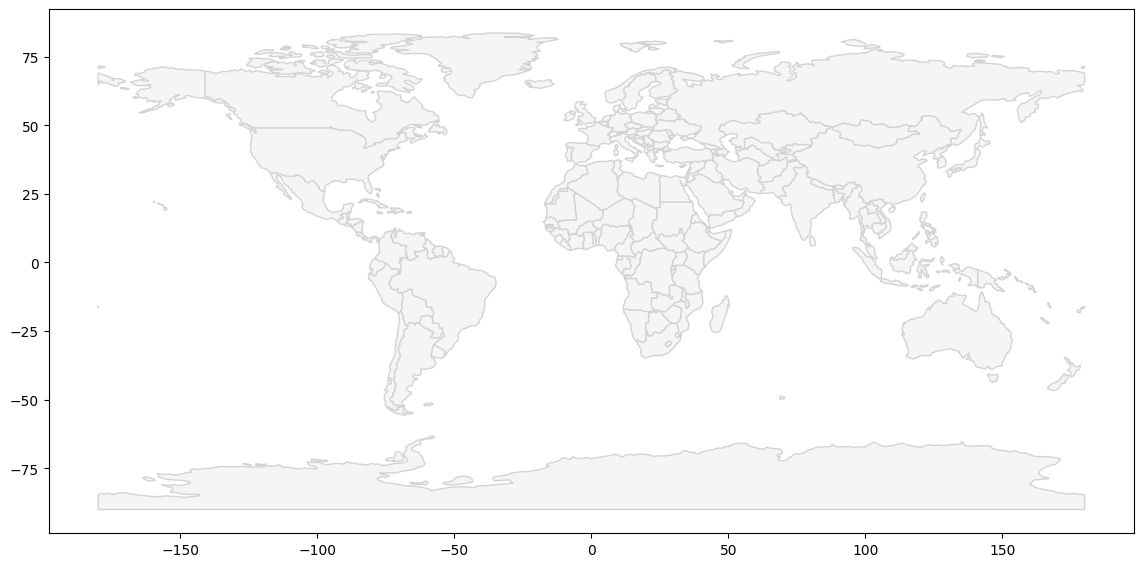

In [10]:
# Retrieve Country Centroids
# Geopy, or dictionary


#


# # Example approximate coordinates (lat, lon)
# coords = {
#     'USA': (37.09, -95.71),
#     'CAN': (56.13, -106.35),
#     'MEX': (23.63, -102.55),
#     'CHN': (35.86, 104.19),
#     'AUS': (-25.27, 133.77),
#     'IND': (20.59, 78.96),
#     'IDN': (-0.79, 113.92),
#     'FRA': (46.23, 2.21),
#     'DEU': (51.16, 10.45),
#     'RUS': (61.52, 105.32),
#     'EGY': (26.82, 30.80),
#     'SAU': (23.89, 45.08),
# }



# Retrieve 

import geopandas as gpd
import pandas as pd

# Load Natural Earth dataset (through geodatasets)
# world = gpd.read_file(geodatasets.get_path("naturalearth.countries"))

# url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
# world = gpd.read_file(url)

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Compute centroids
world["centroid"] = world.geometry.centroid
world["lat"] = world.centroid.y
world["lon"] = world.centroid.x

# Make a lookup dictionary: ISO_A3 → (lat, lon)
iso_to_coords = dict(zip(world["ISO_A3"], zip(world["lat"], world["lon"])))

# Example: if your NetworkX nodes are ISO3 codes
countries = ["AUS", "USA", "CHN", "IND", "BRA"]
coords = {iso: iso_to_coords.get(iso) for iso in countries}

# Check result
for k, v in coords.items():
    print(f"{k}: {v}")








# Convert node coordinates to a GeoDataFrame
node_df = pd.DataFrame({
    "country": list(coords.keys()),
    "lat": [coords[c][0] for c in coords],
    "lon": [coords[c][1] for c in coords],
})

node_gdf = gpd.GeoDataFrame(
    node_df,
    geometry=gpd.points_from_xy(node_df.lon, node_df.lat),
    crs="EPSG:4326"
)

# Get world basemap
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# --- PLOT ---
fig, ax = plt.subplots(figsize=(14, 7))
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgray")

# Draw edges manually using coordinate pairs
for u, v in G.edges():
    x = [coords[u][1], coords[v][1]]
    y = [coords[u][0], coords[v][0]]
    ax.plot(x, y, color="gray", alpha=0.5, linewidth=0.7)

# Draw nodes
node_gdf.plot(ax=ax, color="red", markersize=40)

# Add labels
for i, row in node_gdf.iterrows():
    ax.text(row.lon + 2, row.lat + 1, row.country, fontsize=8, color="black")

plt.title("Global Country Network (GeoPandas, no Shapely import)", fontsize=14, weight="bold")
ax.set_axis_off()
plt.show()


# 
Seb made version
## Initial Imports

NOTE: There is a known issue that france and other countries have no ISO code.\
This has been manually corrected for affected countries\
https://github.com/geopandas/geopandas/issues/1041

In [87]:
import geopandas as gpd
# pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


# Get World Basemap (For map)
url_basemap = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
basemap = gpd.read_file(url_basemap)

# Get World Shapefile (For country coordinates)
url_world_shp = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world_shp = gpd.read_file(url_world_shp)

# Incorrect ISO Codes in source
world_shp.loc[world_shp["NAME"] == 'France',    'ISO_A3'] = 'FRA'
world_shp.loc[world_shp["NAME"] == 'Hong Kong', 'ISO_A3'] = 'HKG'

In [101]:

def retrieve_country_centroid(ISO_Code, world_shp):
    """
    Params:
        ISO_Code: A 3-letter ISO country code, e.g. "AUS"
        world_shp: A world shapefile from geopandas
    Returns:
        Coordinates for centerpoint of that country
    """
    # Find which country row matches the ISO name
    country_match = world_shp.index[world_shp["ISO_A3"] == ISO_Code]
    if(len(country_match) == 0):
        # No Match
        print("Retrieving centroid for", ISO_Code, "NO MATCH")
        return [0,0]
    country_id = country_match.tolist()[0]

    # Retrieve Centroid
    centroid = world_shp.geometry.centroid[country_id]
    coord = [centroid.x, centroid.y]

    print("Retrieving centroid for", ISO_Code + ", row", country_id, "-", coord)

    return coord

# Plot Label Points
country_list = list(G.nodes())
centroid_coords_x = []
centroid_coords_y = []

for country in country_list:
    coord = retrieve_country_centroid(country, world_shp)
    centroid_coords_x.append(coord[0])
    centroid_coords_y.append(coord[1])

    # ax.scatter(coord[0], coord[1])
    # ax.text(coord[0] + 2, coord[1] + 1, country, fontsize=8, color="black")


# Create Dataframe
centroid_df = pd.DataFrame()
centroid_df["country"] = country_list
centroid_df["x"] = centroid_coords_x
centroid_df["y"] = centroid_coords_y


Retrieving centroid for UGA, row 168 - [32.35755031998686, 1.2954855035097297]
Retrieving centroid for SSD, row 176 - [30.198617582461907, 7.292890133516845]
Retrieving centroid for EGY, row 163 - [29.844461513124415, 26.50661999974957]
Retrieving centroid for SDN, row 14 - [29.862604012257922, 15.990585003116717]
Retrieving centroid for ZAF, row 25 - [25.048013879861678, -28.947033259979115]
Retrieving centroid for CIV, row 60 - [-5.6120436452252225, 7.5537550070104915]
Retrieving centroid for NGA, row 56 - [7.995127754089786, 9.548318418209965]
Retrieving centroid for CHN, row 139 - [103.88361230063249, 36.555066531858685]
Retrieving centroid for JPN, row 155 - [138.06496213270776, 37.66311081170466]
Retrieving centroid for IDN, row 8 - [117.42340756227364, -2.221737936520542]
Retrieving centroid for MYS, row 148 - [109.6981484486297, 3.7255884257737155]
Retrieving centroid for BGD, row 99 - [90.26792827719598, 23.83946179534406]
Retrieving centroid for IND, row 98 - [79.593703763253

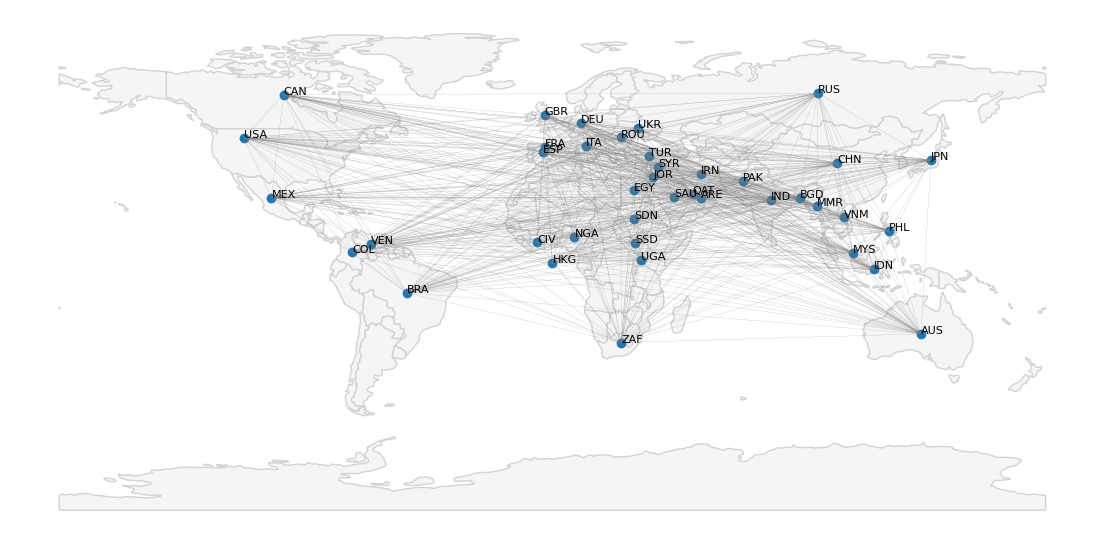

In [108]:
# Plot World Map
fig, ax = plt.subplots(figsize=(14, 7))
world.plot(ax=ax, color="whitesmoke", edgecolor="lightgray")
ax.set_axis_off()


ax.scatter(centroid_df["x"], centroid_df["y"])

for i, row in centroid_df.iterrows():
    ax.text(row["x"], row["y"], row["country"], fontsize=8, color="black")


# Plot Pairs
for country1, country2 in G.edges():
    country1_df = centroid_df.loc[centroid_df["country"] == country1]
    country2_df = centroid_df.loc[centroid_df["country"] == country2]

    x = [country1_df["x"], country2_df["x"]]
    y = [country1_df["y"], country2_df["y"]]
    ax.plot(x, y, color="gray", alpha=0.5, linewidth=0.1)

plt.show()